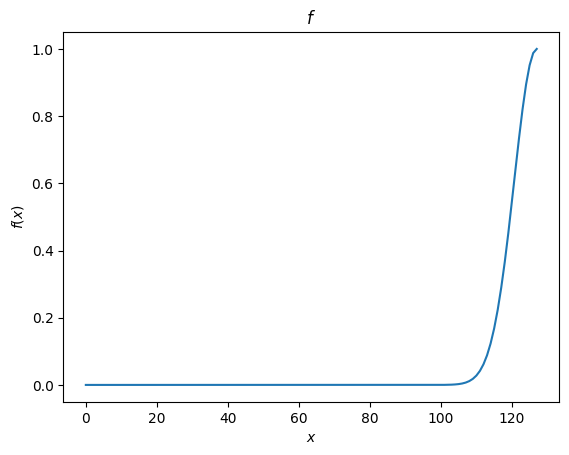

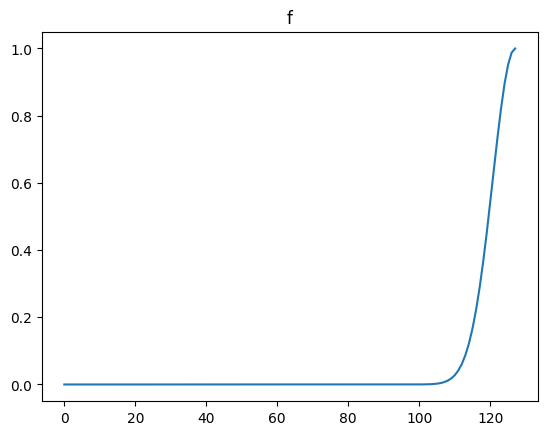

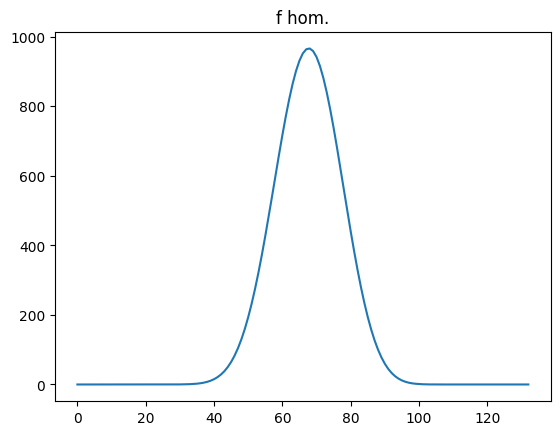

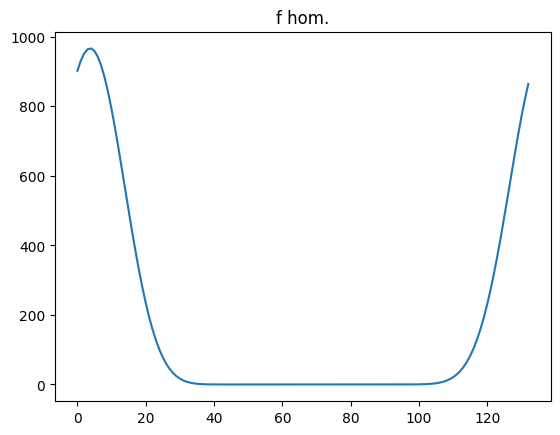

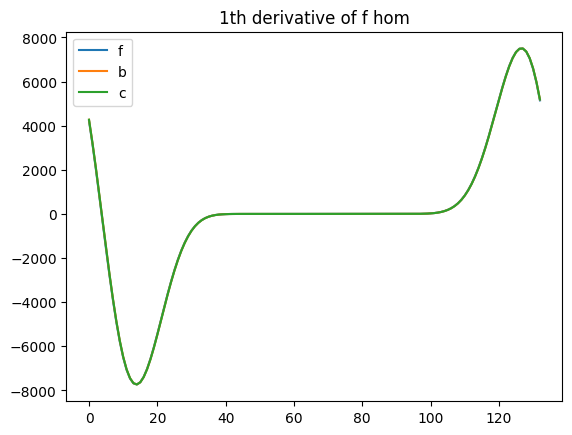

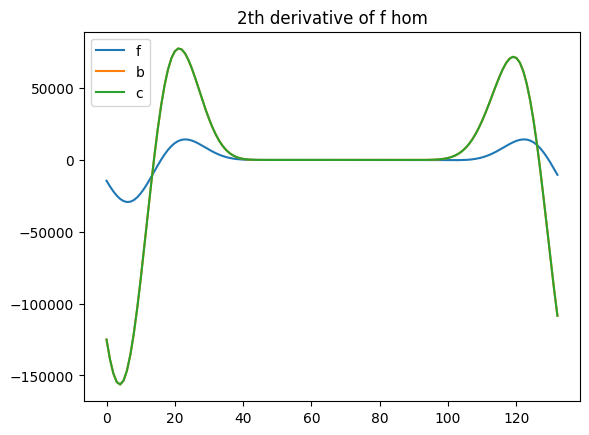

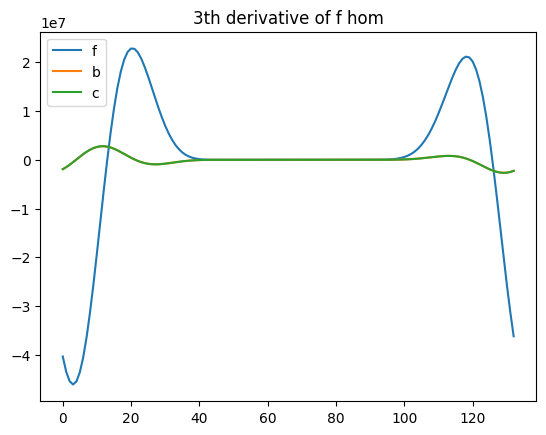

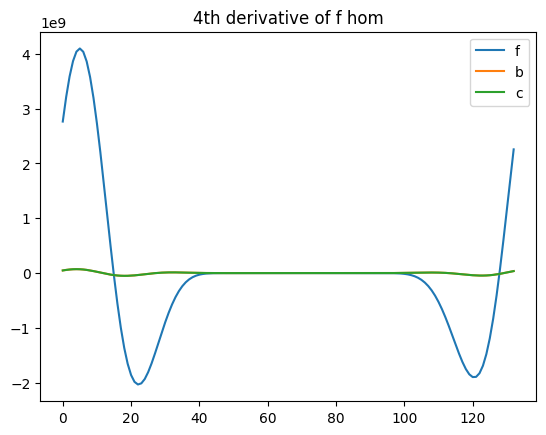

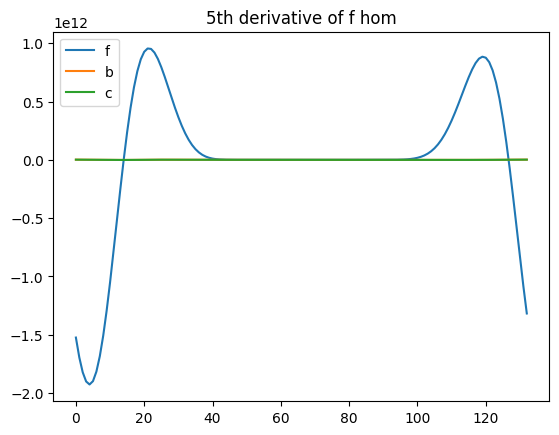

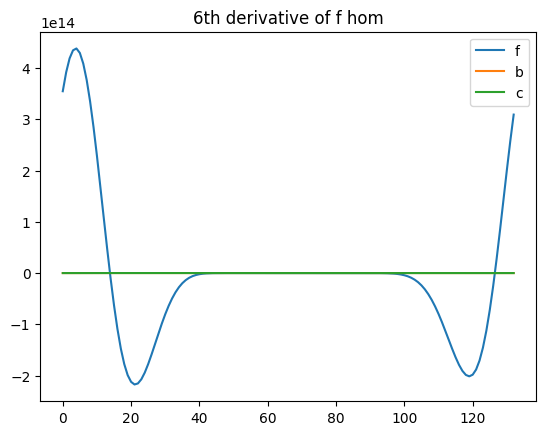

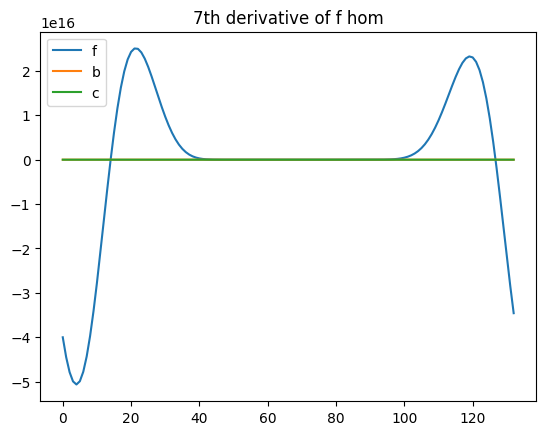

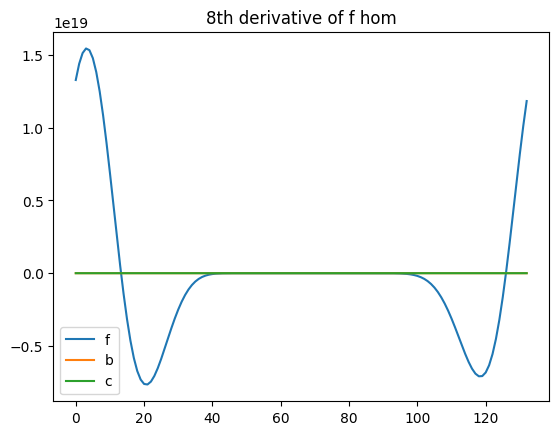

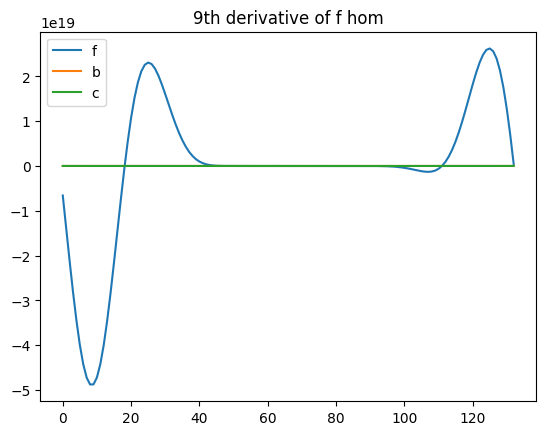

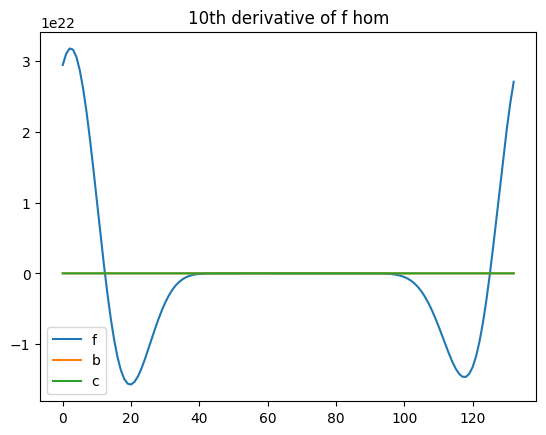

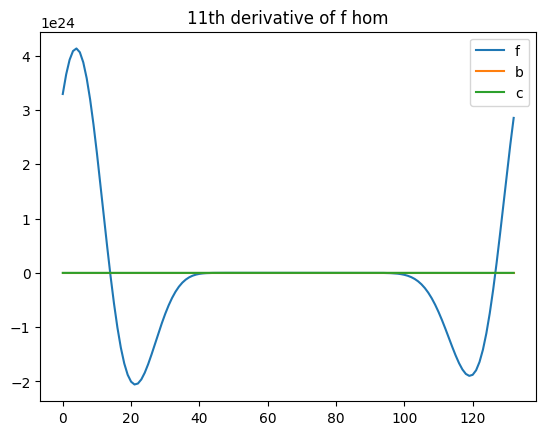

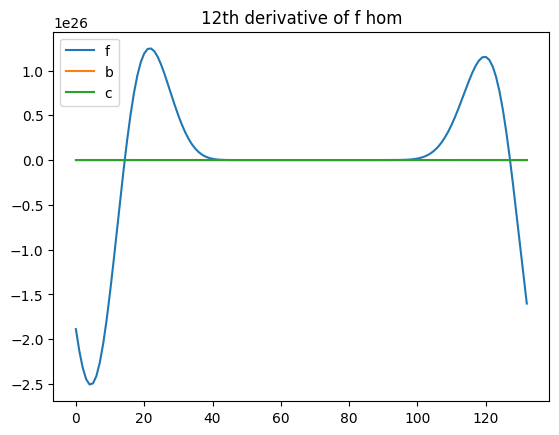

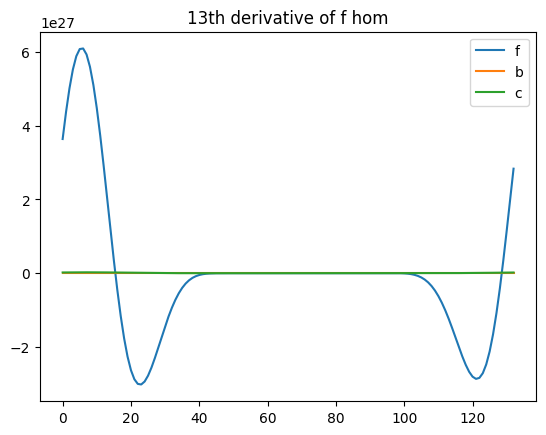

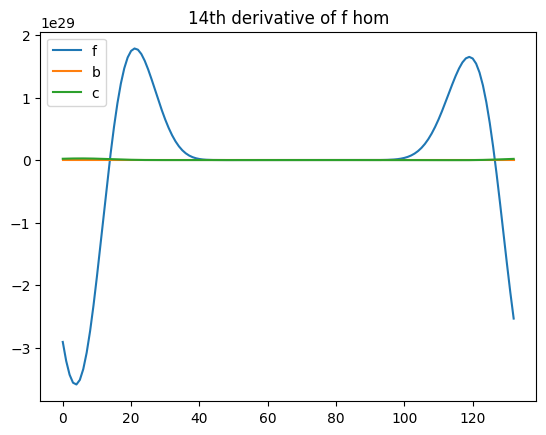

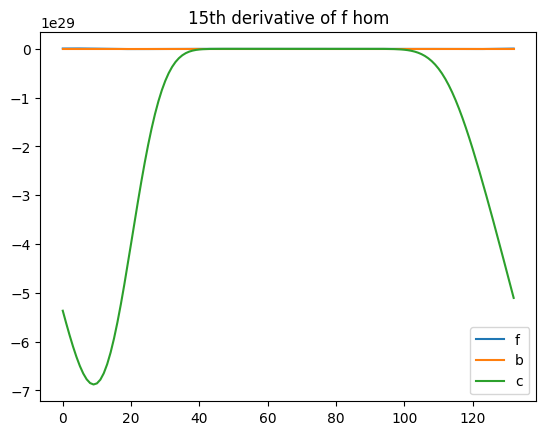

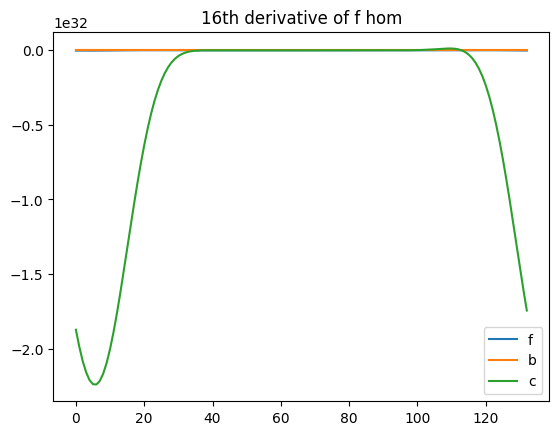

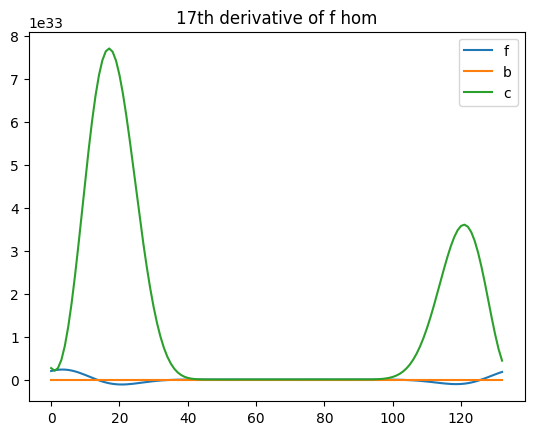

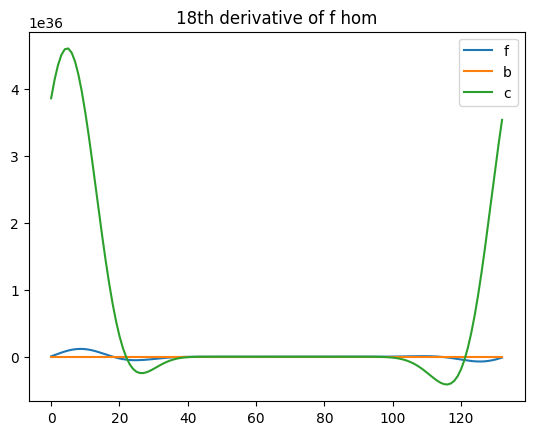

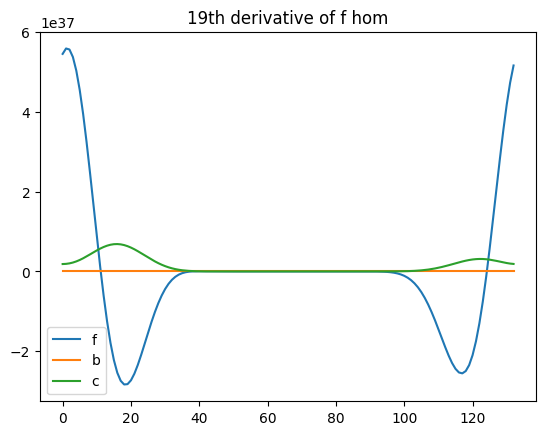

In [26]:
import spectral_derivative as sd
import numpy as np 
import matplotlib.pyplot as plt

L                 = 1
N                 = 128
dx                = L/(N - 1)
x                 = np.arange(0, N) * dx
dt                = 1e-4
v                 = 1
fdl               = 1
fdr               = 0
BC                = sd.PERIODIC
mode              = sd.M_NTH_ORDER
derivativeMode    = sd.ONE_SIDED
t                 = 0.7
n                 = 19

def func(x, v, t):
    return np.exp(-(x-0.3 - t * v)**2/0.005)

f  = func(x, v, t    )

plt.title(r"$f$")
plt.plot(f)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.show()

#Create shift function that such that f - B fulfills either Dirichlet, Neumann or periodic boundary conditions depending on mode
B = sd.getShiftFunction(x, f, mode, derivativeMode, lb = fdl, rb = fdr, N = n, debug= False)

#Boundary for finite difference stencil
lind =          fdl
rind = len(x) - fdr 


plt.title("f") 
plt.plot(f) 
plt.show() 

#Subtract linear shift function to enforce Dirichlet BC when computing second derivative
homf            = f[ lind : rind ] - B[0]
homf = np.pad(homf, (3, 3), mode="constant")
plt.title("f hom.") 
plt.plot(homf) 
plt.show() 

homrot = np.roll(homf, int(-N/2))

plt.title("f hom.") 
plt.plot(homrot) 
plt.show() 

for j in range(n):
    dfhomrot = sd.getDerivative(homrot, dx, sd.fstencils[n][j], j + 1, axis=0)
    dbhomrot = sd.getDerivative(homrot, dx, sd.bstencils[n][j], j + 1, axis=0)
    dchomrot = sd.getDerivative(homrot, dx, sd.cstencils[n][j], j + 1, axis=0)

    plt.title(f"{j+1}th derivative of f hom")
    plt.plot(dfhomrot, label="f") 
    plt.plot(dbhomrot, label="b") 
    plt.plot(dchomrot, label="c") 
    plt.legend()
    plt.show()